<b> Bank marketing prediction Machine  learning project
    
   <b> Submitted by:
    
 <b> KALAIYARASAN DASS

<b> ML Project - Bank Marketing Prediction 
    
    Tasks to perform 
    
   1 . Read in the file and get basic information about the data, including numerical summaries.</b>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-marketing.csv')
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 19)

<b> So, we have 45211 records with 19 collumns </b>

In [4]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

<b> response column is our target variable and others are feature columns </b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


<b> So, there are total 19 columns outta which 8 are numerical and 11 are categorical. and no null value in any column, so that's a good news! </b>

In [6]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<b> 2 . Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values? </b>

In [7]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

<b> yes, there is definitely something fishy going on here, we can see that min value is -1 and 75% of the values are -1. </b>

In [8]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

<b> As we can see there are 36,954 records having pvalue -1. this is hurting the overall mean. </b>

<b> So, i did a quick search on UCI machine Learning repo site to check what does the pdays actually means:
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
here 999 is replace by -1 </b>

<b> So, if pdays = -1, it indicates that this person was not previosly contacted so, we will drop these records because we want to study on people who was involved in the campaign </b>

In [9]:
df = df.drop(df[df.pdays==-1].index)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [10]:
df.shape

(8257, 19)

<b> 3. Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values? </b>

In [11]:
df.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

<b> Now that we have limit ourselves to the relevant values only the mean and median looks better.</b>

<b> 4. Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median? </b>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
df.groupby(['education'])['balance'].agg(np.median)

education
primary      520.0
secondary    527.0
tertiary     775.0
unknown      782.0
Name: balance, dtype: float64

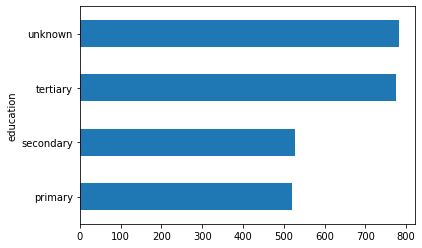

In [14]:
df.groupby(['education'])['balance'].agg(np.median).plot(kind='barh');

<b> So the unknown group has the highest median, and then tertiary is the second highest </b>

<b> 5. Make a box plot for pdays. Do you see any outliers? </b>

<AxesSubplot:xlabel='pdays'>

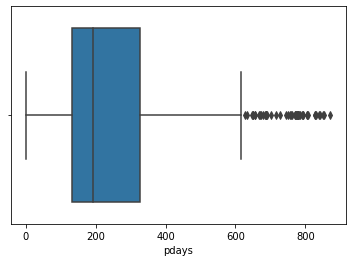

In [15]:
sns.boxplot(df.pdays)

<b> 
so our median lies at 200, and there are some outliers after 600.</b>

<b> Bivariate Analysis</b>

<b> Convert the response variable to a convenient form </b>

In [16]:
df = df.replace({'response': {"yes": 1,'no':0}})

In [17]:
all_cols = df.columns
numerical_cols = df._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)- set(numerical_cols))

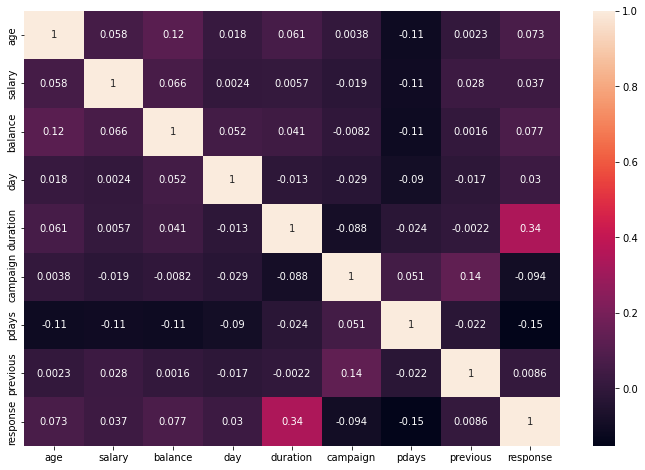

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True);

<b> Histograms </b>

In [19]:
import warnings
warnings.filterwarnings("ignore")

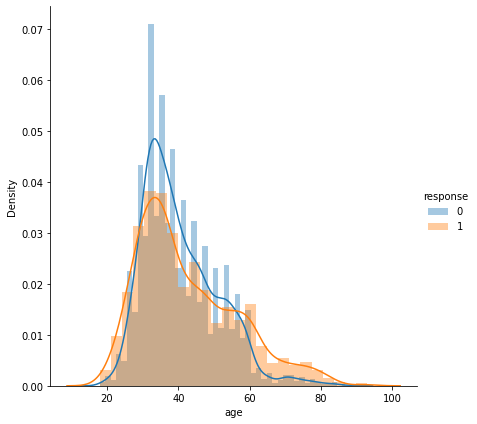

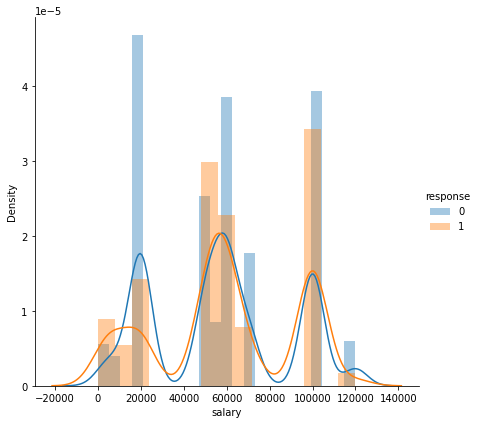

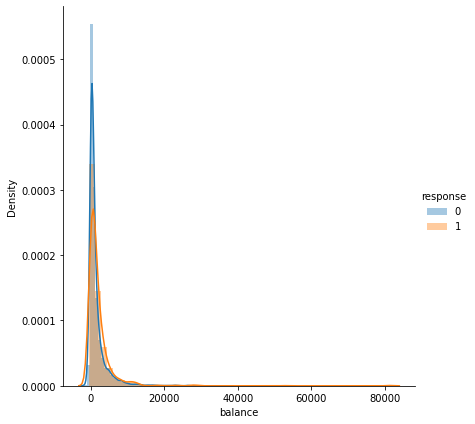

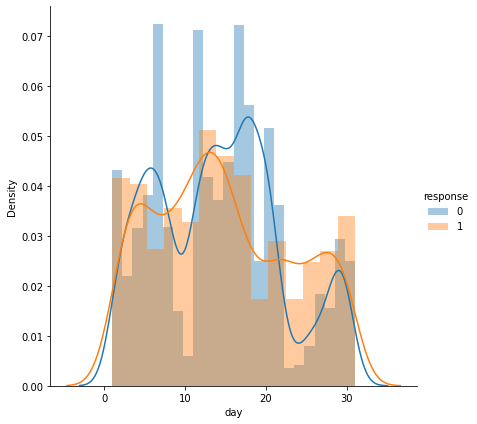

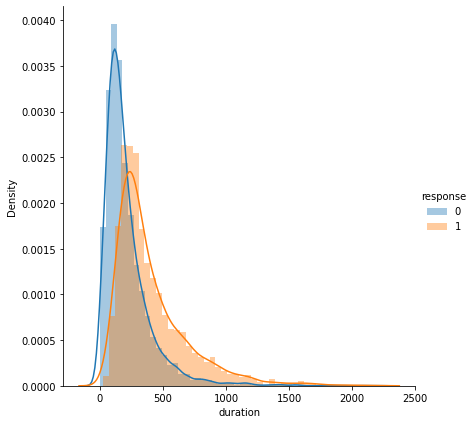

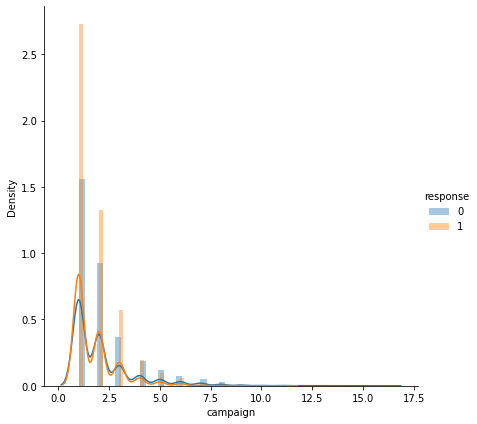

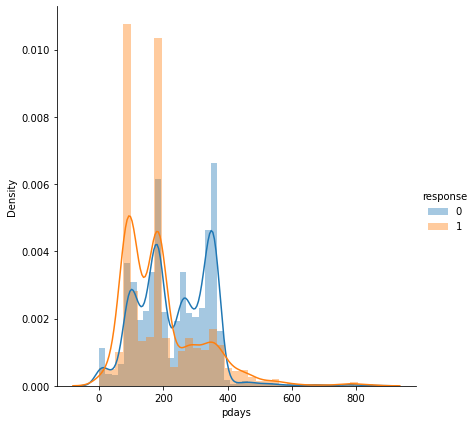

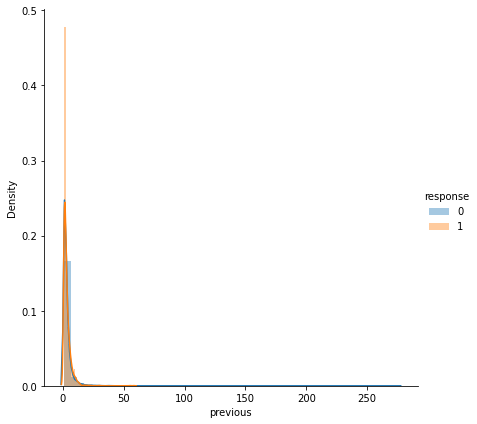

In [20]:
for col in numerical_cols:
    if col != 'response':
        sns.FacetGrid(df, hue='response', height=6).map(sns.distplot, col).add_legend()

<b> Box Plots </b>

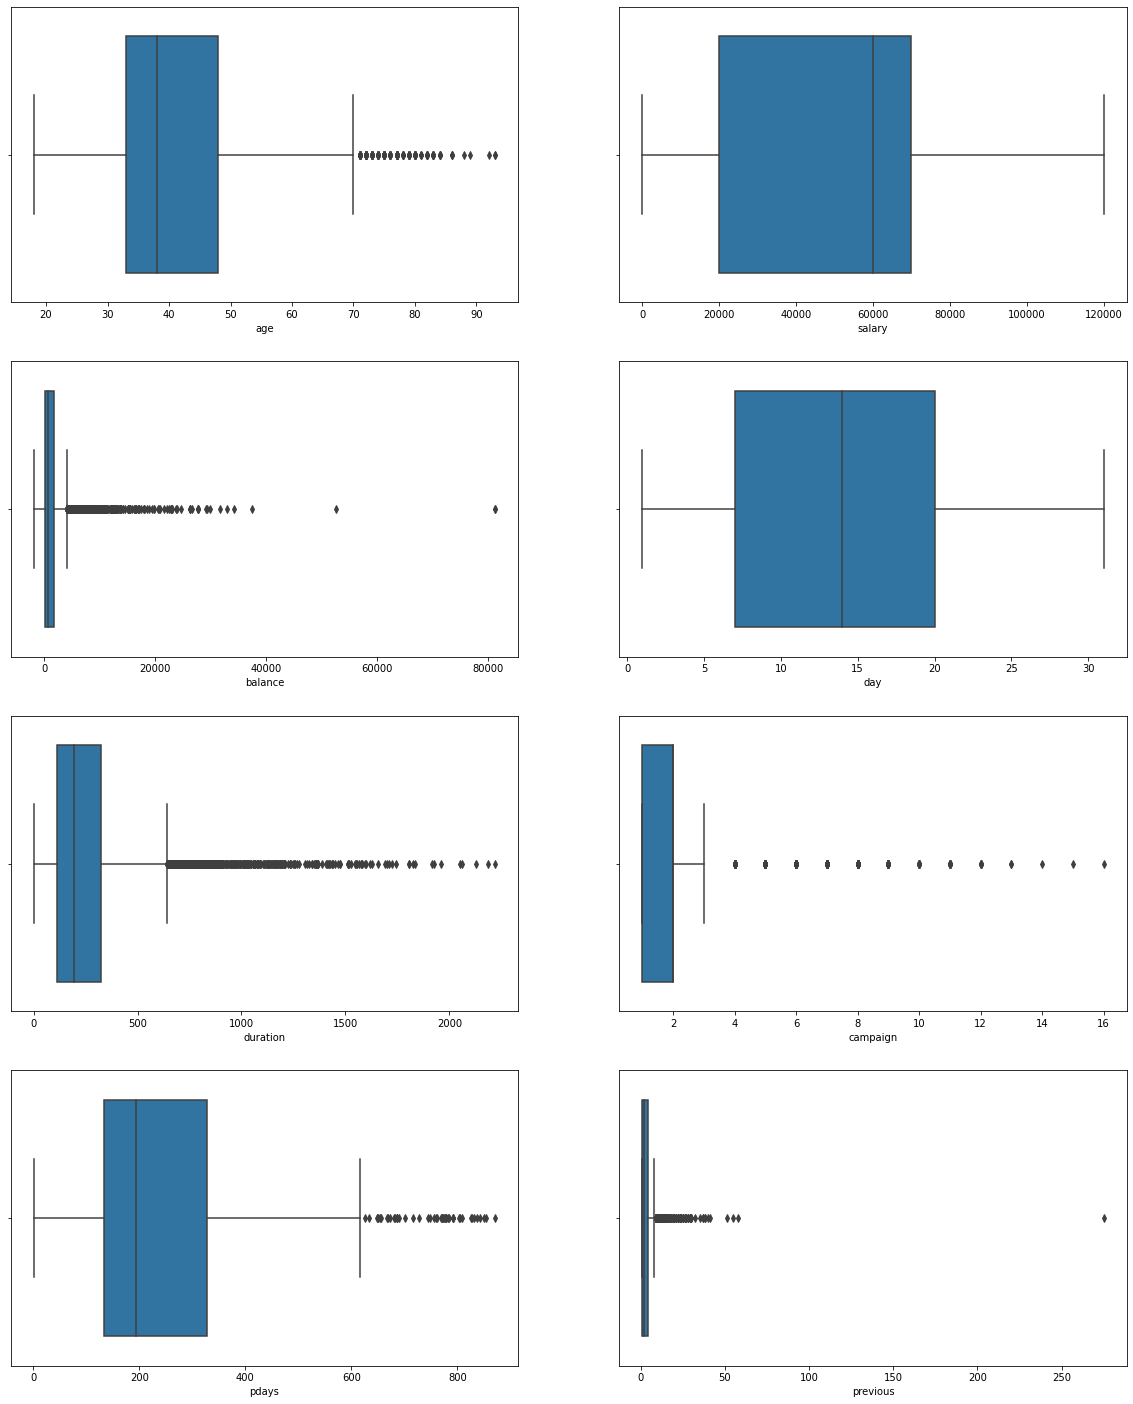

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))

for ax, col in list(zip(axes.flat, numerical_cols)):   
    if col != 'response':    
        sns.boxplot(col, data=df, ax=ax)

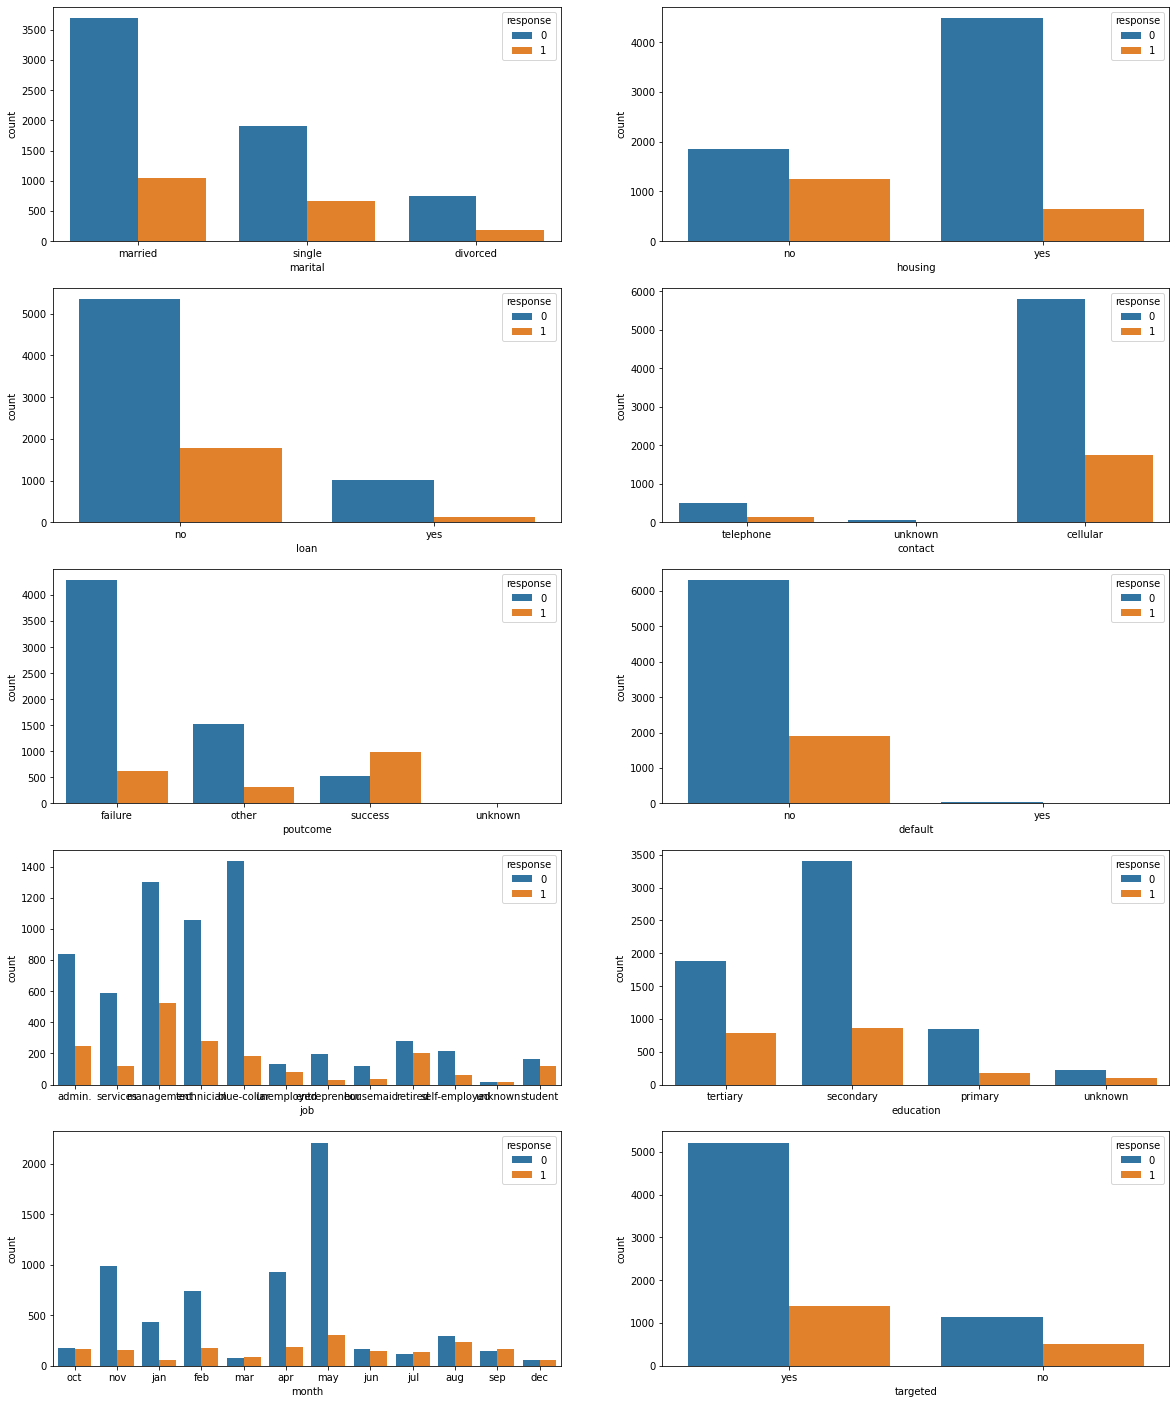

In [22]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))

for ax, col in list(zip(axes.flat, categorical_cols)):        
    sns.countplot(col, data=df,hue=df['response'], ax=ax)

<b> 6.Are the features about the previous campaign data useful? </b>

In [23]:
df[numerical_cols].corr()['response']

age         0.072577
salary      0.036774
balance     0.076995
day         0.029952
duration    0.342610
campaign   -0.094110
pdays      -0.152206
previous    0.008622
response    1.000000
Name: response, dtype: float64

<b> From the above, we can see previous collumns is not highly corelated with the response variable.</b>

<b> 7. Are pdays and poutcome associated with the target? If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.
yes, if the previous outcome is success there is a high chance to get successful response again, so i will use poutcome in my final model.

if pdays = -1, it indicates that this person was not previosly contacted so, i have dropped these records because we want to study on people who was involved in the campaign</b>

<b> Data Preprocessing</b>

<b> Dropping collumns with unknown values, because those hurts the distributions </b>

In [24]:
df.drop(df[df['poutcome']=='unknown'].index, inplace=True)
df.drop(df[df['contact']=='unknown'].index, inplace=True)
df.drop(df[df['job']=='unknown'].index, inplace=True)

In [25]:
df.job = df.job.str.replace('admin.', 'admin') 

<b>Convert Categorical Features into Numerical</b>

In [26]:
df_final = df.copy(deep=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
df_final[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

In [28]:
df_final.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,0,50000,1,2,1,0,882,0,0,1,21,10,39,1,151,3,0,0
24062,42,0,50000,2,1,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24064,33,7,70000,1,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24072,36,4,100000,1,2,1,0,2415,1,0,1,22,10,73,1,86,4,1,0
24077,36,4,100000,1,2,1,0,0,1,0,1,23,10,140,1,143,3,0,1


<b> Train-Test Split</b>

In [29]:
y = df_final.pop('response')
X = df_final

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)
X_train.shape, y_train.shape

((5704, 18), (5704,))

<b> Feature scaling</b>

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [33]:
sc.fit(X_train[numerical_cols[:-1]])

StandardScaler()

In [34]:
X_train[numerical_cols[:-1]] = sc.transform(X_train[numerical_cols[:-1]])
X_train.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
40491,1.049063,0,-0.250633,2,1,1,0,0.120390,0,0,1,-0.924492,5,-0.763877,-0.053701,-1.328660,0.163412,0
43777,0.961920,0,-0.250633,2,1,1,0,-0.265456,1,0,0,1.224110,8,1.884625,-0.686580,1.395901,1.171091,0
32747,0.526205,0,-0.250633,2,0,1,0,-0.278923,0,0,0,0.339392,0,-0.802510,-0.686580,-0.672247,-0.441195,0
44680,-1.216658,6,0.065422,2,2,0,0,-0.317445,0,0,1,-1.430045,11,1.214987,4.376450,2.178200,-0.239659,0
32910,0.177632,4,1.329641,1,2,1,0,-0.438022,1,0,0,0.339392,0,-0.562127,1.212056,1.027231,-0.441195,1


In [35]:
X_test[numerical_cols[:-1]] = sc.transform(X_test[numerical_cols[:-1]])
X_test.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
25359,0.003346,0,-0.250633,1,1,1,0,-0.077231,1,1,0,0.465780,9,0.708467,-0.053701,-0.420473,-0.239659,0
36458,0.526205,0,-0.250633,2,1,1,0,0.746450,1,0,1,-0.418938,8,-0.866898,0.579177,1.000255,-0.038124,1
35041,-1.216658,8,-1.704486,2,1,1,0,0.476796,1,0,1,-1.050880,8,-0.849728,1.212056,1.207070,-0.441195,0
32655,-0.345227,9,0.065422,1,1,1,0,-0.521017,1,0,0,0.339392,0,2.837571,-0.053701,0.361827,-0.038124,0
35572,0.177632,0,-0.250633,0,1,1,0,-0.447105,1,0,0,-0.924492,8,0.060292,0.579177,1.216062,-0.239659,0


<b> Predictive model 1: Logistic regression </b>

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, classification_report
from sklearn.model_selection import cross_val_score

In [37]:
clf = LogisticRegression()

In [38]:
clf.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = clf.predict(X_test)

In [42]:
def show_report(clf, y_true, y_pred): 
    print('Accuracy: ',accuracy_score(y_true, y_pred))
    print('================================')
    print('Precision: ',precision_score(y_true, y_pred))
    print('================================')
    print('Recall: ',recall_score(y_true, y_pred))
    print('================================')
    print('\nClassification Report\n')
    print(classification_report(y_true, y_pred))
    print('================================')
    print('\nconfusion_matrix\n')
    print(confusion_matrix(y_true, y_pred))
    print('================================')
    print('\ncross validation:',cross_val_score(clf, X, y, cv=5))

In [43]:
show_report(clf, y_pred, y_test)

Accuracy:  0.8253578732106339
Precision:  0.5051369863013698
Recall:  0.6812933025404158

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2012
           1       0.51      0.68      0.58       433

    accuracy                           0.83      2445
   macro avg       0.72      0.77      0.73      2445
weighted avg       0.85      0.83      0.83      2445


confusion_matrix

[[1723  289]
 [ 138  295]]

cross validation: [0.79509202 0.72331288 0.77852761 0.77361963 0.73112339]


<b> RFE Model </b>

In [44]:
from sklearn.feature_selection import RFE
rfe = RFE(clf, 15)

In [45]:
rfe = rfe.fit(X_train, y_train)
ranks = rfe.ranking_
ranks

array([1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1])

<b> The higher values mean that they were dropped at the early stage and the smaller values mean that they survive till the end and prove themselves fittest for the model. In a nutshell, columns with lower ranks are good for us. </b>

In [46]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
clf.fit(X_train[cols],y_train)
y_pred2 = clf.predict(X_test[cols])

Index(['age', 'salary', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [47]:
show_report(clf, y_pred2, y_test)

Accuracy:  0.8233128834355828
Precision:  0.4982876712328767
Recall:  0.6767441860465117

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2015
           1       0.50      0.68      0.57       430

    accuracy                           0.82      2445
   macro avg       0.71      0.77      0.73      2445
weighted avg       0.85      0.82      0.83      2445


confusion_matrix

[[1722  293]
 [ 139  291]]

cross validation: [0.79509202 0.72331288 0.77852761 0.77361963 0.73112339]


<b> VIF</b>

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif = pd.DataFrame()
vif['features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i).round(2) for i in range(X_train[cols].shape[1])]
vif = vif.sort_values(by='VIF', ascending=True)
vif

,features,VIF
4,default,1.01
9,day,1.01
13,previous,1.02
10,duration,1.03
5,balance,1.04
11,campaign,1.04
8,contact,1.15
7,loan,1.17
0,age,1.20
1,salary,1.21


<b> P-value</b>

In [50]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
a = sm.add_constant(X_train[cols])
b = y_train

In [51]:
model = sm.OLS(b, a)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     173.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:38:29   Log-Likelihood:                -2047.9
No. Observations:                5704   AIC:                             4128.
Df Residuals:                    5688   BIC:                             4234.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1922      0.017     11.184      0.0

In [52]:
pvals = []
for i in cols:
    a = round(results.pvalues[i],3)
    pvals.append(a)

a = zip(cols, pvals)
df_pvals = pd.DataFrame(a, columns=['Column', 'pvalues']).sort_values('pvalues')
df_pvals

,Column,pvalues
6,housing,0.000
7,loan,0.000
10,duration,0.000
11,campaign,0.000
14,poutcome,0.000
3,education,0.001
5,balance,0.025
8,contact,0.059
2,marital,0.109
0,age,0.121


In [54]:
final_features = df_pvals.nlargest(8, 'pvalues')['Column'].to_list()
final_features

['default', 'previous', 'pdays', 'day', 'salary', 'age', 'marital', 'contact']

<b> 
Using selected features </b>

In [55]:
clf.fit(X_train[final_features], y_train)
y_pred3 = clf.predict(X_test[final_features])

In [56]:
show_report(clf, y_pred3, y_test)

Accuracy:  0.7603271983640082
Precision:  0.0
Recall:  0.0

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      2443
           1       0.00      0.00      0.00         2

    accuracy                           0.76      2445
   macro avg       0.50      0.38      0.43      2445
weighted avg       1.00      0.76      0.86      2445


confusion_matrix

[[1859  584]
 [   2    0]]

cross validation: [0.79509202 0.72331288 0.77852761 0.77361963 0.73112339]


In [57]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(clf)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['housing', 'loan', 'contact', 'duration', 'poutcome'], dtype='object')

<b> So these are the most imposrtant features </b>


<b> Predictive model 2: Random Forest </b>

<b> Using all features</b>

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=48,max_depth=5)
clf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=48)

In [59]:
y_pred_rf = clf2.predict(X_test)

In [60]:
show_report(clf2, y_pred_rf, y_test)

Accuracy:  0.8372188139059304
Precision:  0.4332191780821918
Recall:  0.790625

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2125
           1       0.43      0.79      0.56       320

    accuracy                           0.84      2445
   macro avg       0.70      0.82      0.73      2445
weighted avg       0.89      0.84      0.86      2445


confusion_matrix

[[1794  331]
 [  67  253]]

cross validation: [0.77668712 0.83251534 0.84723926 0.85828221 0.60834868]


['poutcome', 'duration', 'housing', 'pdays', 'month']


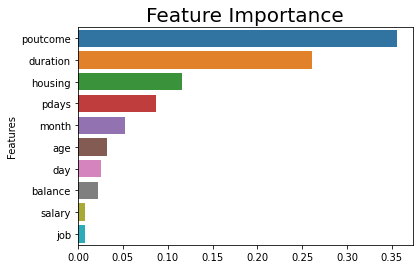

In [61]:
importances=clf2.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
selected_features = feature_importances.index.to_list()[:5]
print(selected_features)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

Using Selected Features

In [62]:
clf2.fit(X_train[selected_features], y_train)
y_pred_rf2 = clf2.predict(X_test[selected_features])

In [63]:
show_report(clf2, y_pred_rf2, y_test)

Accuracy:  0.843762781186094
Precision:  0.5051369863013698
Recall:  0.7603092783505154

Classification Report

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2057
           1       0.51      0.76      0.61       388

    accuracy                           0.84      2445
   macro avg       0.73      0.81      0.75      2445
weighted avg       0.88      0.84      0.86      2445


confusion_matrix

[[1768  289]
 [  93  295]]

cross validation: [0.7797546  0.82760736 0.84907975 0.86380368 0.58993247]


# Compare the performance of the Random Forest and the logistic model 

In [64]:
print('Logistic Regression\n')
show_report(clf , y_pred, y_test)
print('\n')
print('='*100)
print('='*100)
print('\nRandom Forest Classifier\n')
show_report(clf2, y_pred_rf2, y_test)

Logistic Regression

Accuracy:  0.8253578732106339
Precision:  0.5051369863013698
Recall:  0.6812933025404158

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2012
           1       0.51      0.68      0.58       433

    accuracy                           0.83      2445
   macro avg       0.72      0.77      0.73      2445
weighted avg       0.85      0.83      0.83      2445


confusion_matrix

[[1723  289]
 [ 138  295]]

cross validation: [0.79509202 0.72331288 0.77852761 0.77361963 0.73112339]



Random Forest Classifier

Accuracy:  0.843762781186094
Precision:  0.5051369863013698
Recall:  0.7603092783505154

Classification Report

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2057
           1       0.51      0.76      0.61       388

    accuracy                           0.84      2445
   macro avg       0.73      0.81      0.75      2445
weig

The best metric is of randomforest but actually by these confusion matrix we can say that the dataset is highly unbalanced, with nearly all client actually decline to subscribe.This says that the accuracy score is biased, and further evaluation should be carried out to determine the accuracy of logistic regression model.

By all these evaluation we can say that the random forest model perform well on the dataset as the score is high.

By the evaluation we can say that the top feature is "Duration".

So Random Forest has less number of false negatives and slightly better accuracy.